In [1]:
import os
import argparse
from typing import List
from typing import Union
from datetime import datetime
from dataclasses import dataclass
import data
import network
import solver
import joblib
import json
import torch

import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
def gram_schmidt(N, K):
    """
    Given the dimension space dimension N, generate K random vectors and its orthogonal spans
    """
    
    def proj(u,v):
        """
        Return projection of v to u
        """
        return np.dot(v,u)/np.dot(u,u) * u
    
    V=np.random.normal(loc = 0., scale = 1, size = (K, N))
    U=np.zeros_like(V)
    
    ## Initialise u1 to v1
    U[0] = V[0]
    
    ## Gram-schomidt process
    for k in range(1,K):
        projection_terms = [proj(U[i], V[k]) for i in range(k)]
        U[k] = V[k] - np.sum(projection_terms, axis=0)
    
    return V, U
        

def control_VS(VT, angle):
    dim = len(VT)
    VT_norm = VT/np.linalg.norm(VT)
    c = np.cos(angle)
    a = np.random.normal(loc = 0., scale = 1, size = (dim))
    b = np.random.normal(loc = 0., scale = 1, size = (dim))
    h = (b-a) - np.dot((b-a),VT_norm)*VT_norm
    v = np.cos(angle)*VT_norm + np.sin(angle)*h/np.linalg.norm(h)
    
    return v

In [16]:
WS_nid

array([[-3.88561363e-06, -8.25175339e-04, -1.10001013e-03, ...,
         3.96495777e-04, -4.49232876e-04,  1.26811138e-03],
       [ 6.11471491e-04, -4.10637816e-04,  3.14025989e-04, ...,
        -1.90248349e-03,  1.19631246e-03,  5.28119115e-04],
       [ 3.22933006e-04, -3.44760535e-04,  1.89735932e-04, ...,
         1.29344164e-03,  1.00969762e-03,  4.68871956e-04],
       [-2.87917528e-04, -4.75877911e-04,  6.06817032e-04, ...,
         1.23287146e-03, -3.59258252e-04, -1.67064005e-03]])

In [4]:
s=solver.simple_hrl_solver.CurriculumRegressionCompositionalTaskSimulator(input_dim=input_dim,
            seq_len=2,
            num_task=num_task,
            identical=False,
            WT=WT_id,
            WS=WS_id,
            VT=VT_id,
            VS=VS_id)


In [5]:
s.train(num_iter=[0,1000],
                     update_frequency=100,
                     lr={
                         'lr_w': lr_ws[0],
                         'lr_wc': lr_ws[1],
                         'lr_vc': lr_v
                     })

[-1.  1.] [1. 1.]
[ 1. -1.] [-1. -1.]
[ 1. -1.] [1. 1.]
[ 1. -1.] [-1. -1.]
[-1. -1.] [-1.  1.]
[1. 1.] [-1.  1.]
[ 1. -1.] [-1.  1.]
[-1. -1.] [1. 1.]
[-1.  1.] [ 1. -1.]
[ 1. -1.] [ 1. -1.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[ 1. -1.] [1. 1.]
[-1.  1.] [1. 1.]
[-1.  1.] [1. 1.]
[-1.  1.] [1. 1.]
[-1. -1.] [-1. -1.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[-1. -1.] [-1. -1.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[-1. -1.] [-1. -1.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[-1.  1.] [-1. -1.]
[-1.  1.] [-1. -1.]
[-1.  1.] [-1.  1.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[-1. -1.] [ 1. -1.]
[ 1. -1.] [-1. -1.]
[ 1. -1.] [ 1. -1.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[-1.  1.] [-1.  1.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[1. 1.] [-1.  1.]
[1. 1.] [ 1. -1.]
[-1. -1.] [1. 1.]
[-1. -1.] [1. 1.]
[-1.  1.] [ 1. -1.]
[-1.  1.] [1. 1.]

[1. 1.] [ 1. -1.]
[-1. -1.] [1. 1.]
[-1.  1.] [1. 1.]
[1. 1.] [ 1. -1.]
[-1.  1.] [-1. -1.]
[-1. -1.] [1. 1.]
[1. 1.] [-1.  1.]
[1. 1.] [-1. -1.]
[-1.  1.] [1. 1.]
[ 1. -1.] [1. 1.]
[ 1. -1.] [-1. -1.]
[ 1. -1.] [ 1. -1.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[-1. -1.] [-1. -1.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[-1.  1.] [1. 1.]
[ 1. -1.] [1. 1.]
[-1.  1.] [-1. -1.]
[1. 1.] [-1. -1.]
[ 1. -1.] [-1.  1.]
[-1.  1.] [ 1. -1.]
[-1.  1.] [-1. -1.]
[-1. -1.] [-1.  1.]
[1. 1.] [-1.  1.]
[ 1. -1.] [ 1. -1.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[-1.  1.] [-1.  1.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[-1. -1.] [ 1. -1.]
[-1. -1.] [-1. -1.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[-1. -1.] [ 1. -1.]
[ 1. -1.] [ 1. -1.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[1. 1.] [ 1. -1.]
[ 1. -1.] [-1. -1.]
[ 1. -1.] [-1. -1.]
[-1.  1.] [ 1. -1.]
[1. 1.] [-1. -1.]
[-1.

[-1. -1.] [ 1. -1.]
[ 1. -1.] [ 1. -1.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[ 1. -1.] [-1. -1.]
[-1. -1.] [-1. -1.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[1. 1.] [-1.  1.]
[-1.  1.] [-1. -1.]
[1. 1.] [ 1. -1.]
[-1. -1.] [-1. -1.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[1. 1.] [1. 1.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[1. 1.] [-1. -1.]
[-1.  1.] [ 1. -1.]
[-1.  1.] [-1.  1.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[-1. -1.] [1. 1.]
[-1. -1.] [ 1. -1.]
[-1.  1.] [ 1. -1.]
[-1.  1.] [-1. -1.]
[1. 1.] [1. 1.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[-1. -1.] [-1. -1.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[ 1. -1.] [1. 1.]
[-1. -1.] [-1. -1.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[1. 1.] [-1. -1.]
[-1.  1.] [-1. -1.]
[-1.  1.] [1. 1.]
[-1.  1.] [ 1. -1.]
[-1.  1.] [ 1. -1.]
[-1.  1.] [1. 1.]
[1. 1.] [1. 1.]


In [9]:
lr_v

1

In [21]:
s.history['Q']

array([[[ 1.07031309e-06, -4.33434832e-08, -7.34615443e-08,
          4.54269620e-08],
        [-4.33434832e-08,  9.54480518e-07, -1.23087953e-08,
         -3.27475186e-08],
        [-7.34615443e-08, -1.23087953e-08,  9.96756958e-07,
         -9.15479856e-09],
        [ 4.54269620e-08, -3.27475186e-08, -9.15479856e-09,
          9.99098827e-07]],

       [[ 1.07031309e-06, -4.33434832e-08, -7.34615443e-08,
          4.54269620e-08],
        [-4.33434832e-08,  9.54480518e-07, -1.23087953e-08,
         -3.27475186e-08],
        [-7.34615443e-08, -1.23087953e-08,  9.96756958e-07,
         -9.15479856e-09],
        [ 4.54269620e-08, -3.27475186e-08, -9.15479856e-09,
          9.99098827e-07]],

       [[ 1.07031309e-06, -4.33434832e-08, -7.34615443e-08,
          4.54269620e-08],
        [-4.33434832e-08,  9.54480518e-07, -1.23087953e-08,
         -3.27475186e-08],
        [-7.34615443e-08, -1.23087953e-08,  9.96756958e-07,
         -9.15479856e-09],
        [ 4.54269620e-08, -3.27475186e-

In [17]:
lr_ws

[1, 1]

In [15]:
s.WS

array([[-3.88561363e-06, -8.25175339e-04, -1.10001013e-03, ...,
         3.96495777e-04, -4.49232876e-04,  1.26811138e-03],
       [ 6.11471491e-04, -4.10637816e-04,  3.14025989e-04, ...,
        -1.90248349e-03,  1.19631246e-03,  5.28119115e-04],
       [ 3.22933006e-04, -3.44760535e-04,  1.89735932e-04, ...,
         1.29344164e-03,  1.00969762e-03,  4.68871956e-04],
       [-2.87917528e-04, -4.75877911e-04,  6.06817032e-04, ...,
         1.23287146e-03, -3.59258252e-04, -1.67064005e-03]])

In [75]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

@dataclass
class CompositionalTaskSimulator(solver.BaseSimulator):
    num_task: int
    identical: bool
    WT: Union[None, np.array] = None
    WS: Union[None, np.array] = None
    VT: Union[None, np.array] = None
    VS: Union[None, np.array] = None

    def setup_train(self):
        self.lr_wc = self.lr['lr_wc']
        self.lr_vc = self.lr['lr_vc']
        if self.WT is None:
            self.WT = np.random.normal(loc=0.0,
                                       scale=1.0,
                                       size=(self.num_task, self.input_dim))
        for w in self.WT:
            w /= np.sqrt(w @ w.T / self.input_dim)
        if self.WS is None:
            self.WS = np.random.normal(loc=0.0,
                                       scale=1.0,
                                       size=(self.num_task, self.input_dim))
        if self.VT is None:
            self.VT = np.random.normal(loc=0.0, scale=1.0, size=(self.num_task))
        if self.VS is None:
            self.VS = np.random.normal(loc=0.0, scale=1.0, size=(self.num_task))

        self.S = self.WT @ self.WT.T / self.input_dim

    def setup_history(self, num_update):
        self.history = {
            'Q': np.zeros((num_update, self.num_task, self.num_task)),
            'R': np.zeros((num_update, self.num_task, self.num_task)),
            'P': np.zeros((num_update, self.num_task)),
            'VS': np.zeros((num_update, self.num_task)),
            'P_tilde': np.zeros((num_update)),
            'P_empirical': np.zeros((num_update)),
            'MSE': np.zeros((num_update)),
            'MSE_empirical': np.zeros((num_update))
            
        }

    def update_history(self, history_index):
        Q = self.WS @ self.WS.T / self.input_dim
        R = self.WS @ self.WT.T / self.input_dim
        P = 1 - np.arccos(np.diagonal(R) / np.sqrt(np.diagonal(Q))) / np.pi
        if self.identical:
            norm_student = np.sqrt(
                np.sum([
                    self.VS[i] * self.VS[j] * Q[i][j]
                    for i in range(self.num_task)
                    for j in range(self.num_task)
                ]))

            norm_teacher = np.sqrt(
                np.sum([
                    self.VT[i] * self.VT[j] * self.S[i][j]
                    for i in range(self.num_task)
                    for j in range(self.num_task)
                ]))
            angle = np.arccos(
                np.sum([
                    self.VS[i] * self.VT[j] * R[i][j]
                    for i in range(self.num_task)
                    for j in range(self.num_task)
                ]) / norm_teacher / norm_student)
        if not self.identical:
            norm_student = np.sqrt(
                np.sum([
                    self.VS[i] * self.VS[i] * Q[i][i]
                    for i in range(self.num_task)
                ]))

            norm_teacher = np.sqrt(
                np.sum([
                    self.VT[i] * self.VT[i] * self.S[i][i]
                    for i in range(self.num_task)
                ]))
            angle = np.arccos(
                np.sum([
                    self.VS[i] * self.VT[i] * R[i][i]
                    for i in range(self.num_task)
                ]) / norm_teacher / norm_student)
            
            error = 1/np.pi*np.arcsin(norm_student**2 / (1+norm_student**2))- 2/np.pi*np.arcsin(np.sqrt(np.sum([
                    self.VS[i] * self.VT[i] * R[i][i]
                    for i in range(self.num_task)
                ]))/np.sqrt(2*(1+norm_student**2)))+1/6

        P_tilde = 1 - angle / np.pi
        
        a = []
        b=[]
        
        for i in range(100):
            x = np.random.normal(loc=0.0,
                             scale=1.0,
                             size=(4, 1000,4))
            
            (y, y_sign, y_hat, y_hat_sign), (y_tilde, y_tilde_sign, y_tilde_hat, y_tilde_hat_sign) = self.inference(x)

            a.append(np.power(y_tilde - y_tilde_hat,2))
            b.append(np.all(y_tilde_sign == y_tilde_hat_sign))
        mse= np.mean(a)
        p_empirical = np.mean(b)
        self.history['Q'][history_index] = Q
        self.history['R'][history_index] = R
        self.history['P'][history_index] = P
        self.history['VS'][history_index] = self.VS
        self.history['P_tilde'][history_index] = P_tilde
        self.history['P_empirical'][history_index] = p_empirical
        self.history['MSE_empirical'][history_index] = error
        self.history['MSE'][history_index] = mse
        
        
    def inference(self, x):

        def single_task_inference(x):
            y = np.diagonal(self.WT @ x).T / np.sqrt(self.input_dim)
            y_hat = np.diagonal(self.WS @ x).T / np.sqrt(self.input_dim)
            y_sign = np.sign(y)
            y_hat_sign = np.sign(y_hat)

            return y, y_sign, y_hat, y_hat_sign

        y, y_sign, y_hat, y_hat_sign = single_task_inference(x)

        y_tilde = np.tanh(self.VT @ y)
        y_tilde_hat = np.tanh(self.VS @ y_hat)
        y_tilde_sign = np.sign(y_tilde)
        y_tilde_hat_sign = np.sign(y_tilde_hat)
        

        return (y, y_sign, y_hat, y_hat_sign), (y_tilde, y_tilde_sign, y_tilde_hat, y_tilde_hat_sign)
    
    def step(self):

        if self.identical:
            x = np.random.normal(loc=0.0,
                                 scale=1.0,
                                 size=(1, self.input_dim, self.seq_len))
            x = np.repeat(x, self.num_task, axis=0)
        else:
            x = np.random.normal(loc=0.0,
                                 scale=1.0,
                                 size=(self.num_task, self.input_dim,
                                       self.seq_len))

        (y, y_sign, y_hat,
         y_hat_sign), (y_tilde, y_tilde_sign, y_tilde_hat, y_tilde_hat_sign) = self.inference(x)  #num_task*n_seq

        if (y_tilde_sign == y_tilde_hat_sign).all():
            dW = (1 / np.sqrt(self.input_dim)*(y_tilde-y_tilde_hat)[:,None].T * (1-(np.power(y_tilde_hat,2)))[:,None].T *self.VS[:, None] * x.swapaxes(0, 1)).mean(axis=-1).T
            dV = ((y_tilde-y_tilde_hat)* (1-(np.power(y_tilde_hat,2)))*y_hat).mean(axis=-1)
            self.WS += self.lr_wc *dW
            self.VS += self.lr_vc * dV

    """
    def step(self):

        if self.identical:
            x = np.random.normal(loc=0.0,
                                 scale=1.0,
                                 size=(1, self.input_dim, self.seq_len))
            x = np.repeat(x, self.num_task, axis=0)
        else:
            x = np.random.normal(loc=0.0,
                                 scale=1.0,
                                 size=(self.num_task, self.input_dim,
                                       self.seq_len))

        (y, y_sign, y_hat,
         y_hat_sign), (y_tilde, y_tilde_sign, y_tilde_hat, y_tilde_hat_sign) = self.inference(x)  #num_task*n_seq

        if (y_tilde_sign == y_tilde_hat_sign).all():
            dW = (1 / np.sqrt(self.input_dim)* y_tilde_hat_sign[:,None].T* sigmoid(y_hat) *(1-sigmoid(y_hat)) *self.VS[:, None] * x.swapaxes(0, 1)).mean(axis=-1).T
            dV = (1 / self.input_dim * y_tilde_hat_sign* sigmoid(y_hat)).mean(axis=-1)
            self.WS += self.lr_wc *dW
            self.VS += self.lr_vc * dV

    def inference(self, x):

        def single_task_inference(x):
            y = np.diagonal(self.WT @ x).T / np.sqrt(self.input_dim)
            y_hat = np.diagonal(self.WS @ x).T / np.sqrt(self.input_dim)
            y_sign = np.sign(y)
            y_hat_sign = np.sign(y_hat)

            return y, y_sign, y_hat, y_hat_sign

        y, y_sign, y_hat, y_hat_sign = single_task_inference(x)

        y_tilde = self.VT @ sigmoid(y)
        y_tilde_hat = self.VS @ sigmoid(y_hat)
        y_tilde_sign = np.sign(y_tilde)
        y_tilde_hat_sign = np.sign(y_tilde_hat)
        

        return (y, y_sign, y_hat, y_hat_sign), (y_tilde, y_tilde_sign, y_tilde_hat, y_tilde_hat_sign)

    """
@dataclass
class CurriculumCompositionalTaskSimulator(CompositionalTaskSimulator):
    num_task: int
    identical: bool
    WT: Union[None, np.array] = None
    WS: Union[None, np.array] = None
    VT: Union[None, np.array] = None
    VS: Union[None, np.array] = None

    def __post_init__(self):
        self.multipleRLPerceptron = solver.MultipleRLPerceptronSimulator(
            self.input_dim, self.seq_len, self.num_task, self.identical)

    def pretrain_step(self):
        return self.multipleRLPerceptron.step()

    def train(self, num_iter, update_frequency, lr):
        self.lr = lr
        self.setup_history(num_update=sum(num_iter) // update_frequency)
        self.setup_train()

        self.multipleRLPerceptron.WS = self.WS
        self.multipleRLPerceptron.WT = self.WT
        self.multipleRLPerceptron.lr_w = self.lr['lr_w']

        for i in range(num_iter[0]):
            self.pretrain_step()
            if i % update_frequency == 0:
                self.update_history(history_index=i // update_frequency)

        for i in range(num_iter[1]):
            self.step()
            if i % update_frequency == 0:
                self.update_history(history_index=(num_iter[0] + i) //
                                    update_frequency)

In [12]:
3.14/2

1.57

In [3]:
num_task = 4
seq_len = 4
input_dim = 1000
lr_ws=[1,1]
lr_v = 1
nums_iter_curriculum =np.array([200000,200000])
nums_iter_baseline =np.array([0,200000])
update_frequency = 1000


VT_nid = np.array([1.,1.,1.,1.])
VS_nid = control_VS(VT_nid, np.pi/2)

VT_id = VT_nid.copy()
VT_sim_id = VT_nid.copy()
VT_sim_nid = VT_nid.copy()


VS_id = VS_nid.copy()
VS_sim_id = VS_nid.copy()
VS_sim_nid = VS_nid.copy()

_, WT_nid =gram_schmidt(input_dim, num_task)
WT_id = WT_nid.copy()
WT_sim_id = WT_nid.copy()
WT_sim_nid = WT_nid.copy()

WS_nid = np.random.normal(0,0.001, (num_task, input_dim))
WS_id = WS_nid.copy()
WS_sim_id = WS_nid.copy()
WS_sim_nid = WS_nid.copy()

In [65]:
composite_nid.S

array([[ 1.00000000e+00,  3.55271368e-18, -5.32907052e-18,
         1.42108547e-17],
       [ 3.55271368e-18,  1.00000000e+00, -3.90798505e-17,
        -1.50990331e-17],
       [-5.32907052e-18, -3.90798505e-17,  1.00000000e+00,
         1.30156302e-17],
       [ 1.42108547e-17, -1.50990331e-17,  1.30156302e-17,
         1.00000000e+00]])

In [51]:
composite_nid=CurriculumCompositionalTaskSimulator(input_dim = input_dim, seq_len = seq_len, 
                                                                       num_task = num_task, identical = False, WT = WT_sim_nid, 
                                                                 WS=WS_sim_nid, VT=VT_sim_nid, VS=VS_sim_nid  )

In [52]:
start = time.time()
composite_nid.train(num_iter = nums_iter_curriculum, update_frequency=update_frequency, lr={'lr_w':lr_ws[0],'lr_wc':lr_ws[1], 'lr_vc':lr_v})
end = time.time()
print(f'Elapsed time: {end-start}')

Elapsed time: 265.79418087005615


In [77]:
composite_nid2=CurriculumCompositionalTaskSimulator(input_dim = input_dim, seq_len = seq_len, 
                                                                       num_task = num_task, identical = False, WT = WT_sim_id, 
                                                                 WS=WS_sim_id, VT=VT_sim_id, VS=VS_sim_id )

In [78]:
start = time.time()
composite_nid2.train(num_iter = nums_iter_baseline, update_frequency=update_frequency, lr={'lr_w':lr_ws[0],'lr_wc':lr_ws[1], 'lr_vc':lr_v})
end = time.time()
print(f'Elapsed time: {end-start}')

Elapsed time: 126.24631643295288


Text(0, 0.5, 'MSE')

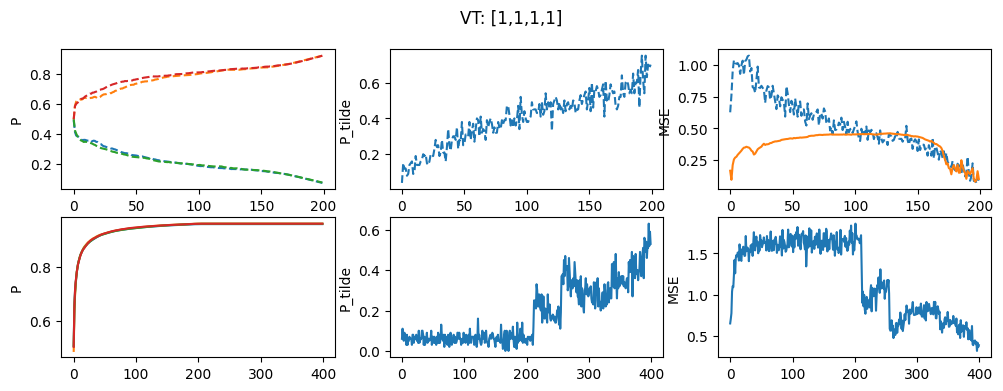

In [79]:
fig = plt.figure(figsize=(12,4))
plt.suptitle('VT: [1,1,1,1]')
ax1 = plt.subplot(231)
pb = composite_nid2.history['P']
ax1.plot(pb, ls = '--', label = 'baseline')
ax1.set_ylabel('P')

ax2 = plt.subplot(232)
ptb=composite_nid2.history['P_empirical']
ax2.plot(ptb, ls='--')
ax2.set_ylabel('P_tilde')

ax3 = plt.subplot(233)
mseb=composite_nid2.history['MSE']
ax3.plot(mseb, ls = '--')
ax3.plot(composite_nid2.history['MSE_empirical'])
ax3.set_ylabel('MSE')


plt.suptitle('VT: [1,1,1,1]')
ax1 = plt.subplot(234)
p=composite_nid.history['P']
ax1.plot(p, label = 'curriculum')
ax1.set_ylabel('P')

ax2 = plt.subplot(235)
pt=composite_nid.history['P_empirical']
ax2.plot(pt)
ax2.set_ylabel('P_tilde')

ax3 = plt.subplot(236)
mse=composite_nid.history['MSE']
ax3.plot(mse)

ax3.set_ylabel('MSE')



Text(0, 0.5, 'MSE')

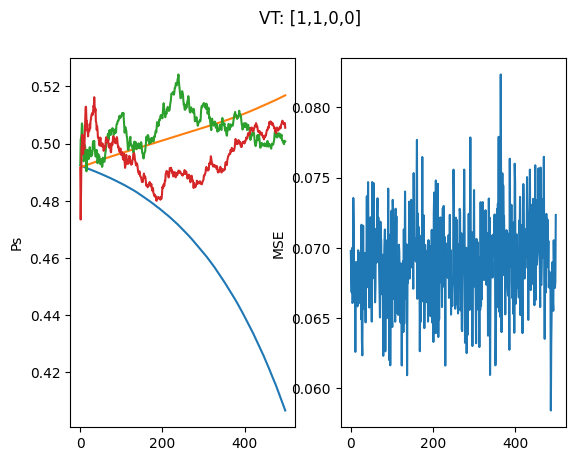

In [135]:
plt.suptitle('VT: [1,1,0,0]')
ax1 = plt.subplot(121)
p=composite_nid2.history['P']
ax1.plot(p)
ax1.set_ylabel('Ps')
ax2 = plt.subplot(122)
pt=composite_nid2.history['P_empirical']
ax2.plot(pt)
ax2.set_ylabel('MSE')


In [41]:
pt

array([0.50236659, 0.6384885 , 0.68233879, 0.69986409, 0.70462855,
       0.70131805, 0.69727839, 0.69030253, 0.68075015, 0.67019572,
       0.65903162, 0.64926001, 0.64158314, 0.63187886, 0.62550417,
       0.6186399 , 0.61138961, 0.60580943, 0.60197307, 0.59875783,
       0.59009593, 0.58232127, 0.58025027, 0.57661146, 0.57244322,
       0.56786047, 0.56614563, 0.56452895, 0.5605343 , 0.55799474,
       0.55595269, 0.55182374, 0.54926573, 0.54782514, 0.54749949,
       0.54340487, 0.54066453, 0.54245621, 0.54072631, 0.5418076 ,
       0.54026626, 0.53713344, 0.53620057, 0.53631649, 0.53482886,
       0.53238505, 0.53225903, 0.53143809, 0.53000176, 0.52738358,
       0.52607866, 0.52497971, 0.5247683 , 0.52478776, 0.52325188,
       0.52307276, 0.52272208, 0.52170933, 0.52189787, 0.52219568,
       0.52325476, 0.52222187, 0.52213523, 0.52134936, 0.52131689,
       0.52107588, 0.51990207, 0.51918279, 0.51910867, 0.5196554 ,
       0.51829301, 0.51673639, 0.515701  , 0.51426376, 0.51343

In [156]:
a = []
for i in range(100):
    x = np.random.normal(loc=0.0,
                     scale=1.0,
                     size=(4, 1000,4))
    (y, y_sign, y_hat, y_hat_sign), (y_tilde, y_tilde_sign, y_tilde_hat, y_tilde_hat_sign) = composite_nid.inference(x)
    
    a.append((y_tilde_sign == y_tilde_hat_sign).all())

In [157]:
np.mean(a)

0.87